In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes

# Data Preparing

In [57]:
#adult dataset from UCI
#the dataset is pretty much clean to feed into model
#so I won't need many steps of data preparation
data = pd.read_csv('../data/adult.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [25]:
#drop some continuous values columns that are not okay with KModes
data = data.drop(['fnlwgt','education-num', 'capital-gain','country','capital-loss'],axis = 1)

In [26]:
#for age and hours-per-week, we will group them 
#into two or three groups to become categorical column
data[['age','hours-per-week']].head(3)

,age,hours-per-week
0,39,40
1,50,13
2,38,40


In [27]:
def get_age_group(value):
    
    if value == 0:
        return 'Unknown'
    elif value < 20:
        return '<20'
    elif 20 <= value <= 40:
        return '20 - 40'
    elif 40 <= value <= 60:
        return '40 - 60'
    elif value > 60:
        return '60+'
    else:
        return 'Unknown'

In [41]:
def get_hpw_group(value): #hours-per-week
    
    if value < 20:
        return '<20'
    elif 20 <= value <= 40:
        return '20 - 40'
    elif 40 <= value <= 60:
        return '40 - 60'
    elif value > 60:
        return '60+'
    else:
        return 'Unknown'

In [33]:
#apply above function to 'age' column to get categorical column
data['age_group'] = data['age'].apply(get_age_group)
data = data.drop(['age'], axis = 1)

In [47]:
#apply above function to 'hours-per-week' column to get categorical column
data['hpw_group'] = data['hours-per-week'].apply(get_hpw_group)
data = data.drop(['hours-per-week'], axis = 1)

In [51]:
data.head()

,workclass,education,marital-status,occupation,relationship,race,sex,salary,age_group,hpw_group
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,<=50K,20 - 40,20 - 40
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,<=50K,40 - 60,<20
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,<=50K,20 - 40,20 - 40
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,<=50K,40 - 60,20 - 40
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,<=50K,20 - 40,20 - 40


In [52]:
#now I got all caterogical columns
#Apply one hot encoding for these columns

user_data = pd.get_dummies(data, prefix_sep='__', columns = data.columns)
user_data.shape

(32561, 70)

In [54]:
#it turned into 70 columns from 10 columns
user_data.head()

,workclass__ ?,workclass__ Federal-gov,workclass__ Local-gov,workclass__ Never-worked,workclass__ Private,workclass__ Self-emp-inc,workclass__ Self-emp-not-inc,workclass__ State-gov,workclass__ Without-pay,education__ 10th,...,salary__ <=50K,salary__ >50K,age_group__20 - 40,age_group__40 - 60,age_group__60+,age_group__<20,hpw_group__20 - 40,hpw_group__40 - 60,hpw_group__60+,hpw_group__<20
0,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0


####

# Model training with KModes

In [ ]:
cost = []
K = range(1,10)

#I set n_init 5 so it will run 5 times for one loop
#and init as 'random' so it will choose the observations at random from data
#Train the data with different cluster values to pick the best cluster K value
#I cleared the outputs cause it is too long

for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(user_data)
    cost.append(kmode.cost_)


Text(0, 0.5, 'Cost')

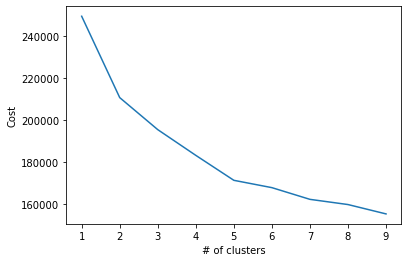

In [61]:
#plot the costs to pick the best cluster value
#I think I can use 5 from this result

y = np.array([i for i in range(1,10,1)])
plt.plot(y, cost)
plt.xlabel('# of clusters')
plt.ylabel('Cost')

In [62]:
#Now I can train with no. of clusters 5 and get results from kmodes algorithm
#and I set n_init to 10 to train 10 times for all data

model_km = KModes(n_clusters = 5, init = "random", n_init=10, verbose=1)

#predict the results

fitClusters = model_km.fit_predict(user_data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12048, cost: 170832.0
Run 1, iteration: 2/100, moves: 5067, cost: 169673.0
Run 1, iteration: 3/100, moves: 333, cost: 169673.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 7842, cost: 187110.0
Run 2, iteration: 2/100, moves: 344, cost: 187110.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 8913, cost: 195169.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 12383, cost: 172172.0
Run 4, iteration: 2/100, moves: 3967, cost: 170335.0
Run 4, iteration: 3/100, moves: 8, cost: 170335.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 10743, cost: 190999.0
Run 5, iteration: 2/100, moves: 1622, cost: 190999.0
Init: initializing 

In [65]:
#check the rows
len(fitClusters), user_data.shape

(32561, (32561, 70))

In [67]:
#convert it into dataframe
clusters = pd.DataFrame({'cluster':fitClusters})
clusters['cluster'].value_counts()

2    7867
0    7131
4    6778
3    5965
1    4820
Name: cluster, dtype: int64

In [68]:
#now I got the different groups of data

#####

# Insert cluster groups into original dataset